In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\aa1\Downloads\Housing.csv")

In [3]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop(columns=['price'])
y = df['price']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [10]:
dft = X_train.join(y_train)

In [11]:
dft

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
409,3185,2,1,1,yes,no,no,no,no,2,no,unfurnished,3430000
137,4640,4,1,2,yes,no,no,no,no,1,no,semi-furnished,5740000
282,2175,3,1,2,no,yes,yes,no,yes,0,no,unfurnished,4270000
227,6000,2,1,1,yes,no,yes,no,yes,1,no,furnished,4690000
451,6750,2,1,1,yes,no,no,no,no,0,no,semi-furnished,3150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,2787,3,1,1,yes,no,yes,no,no,0,yes,furnished,4235000
362,4050,2,1,1,yes,no,no,no,no,0,no,furnished,3710000
252,9860,3,1,1,yes,no,no,no,no,0,no,semi-furnished,4515000
66,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished,6930000


array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>],
       [<Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

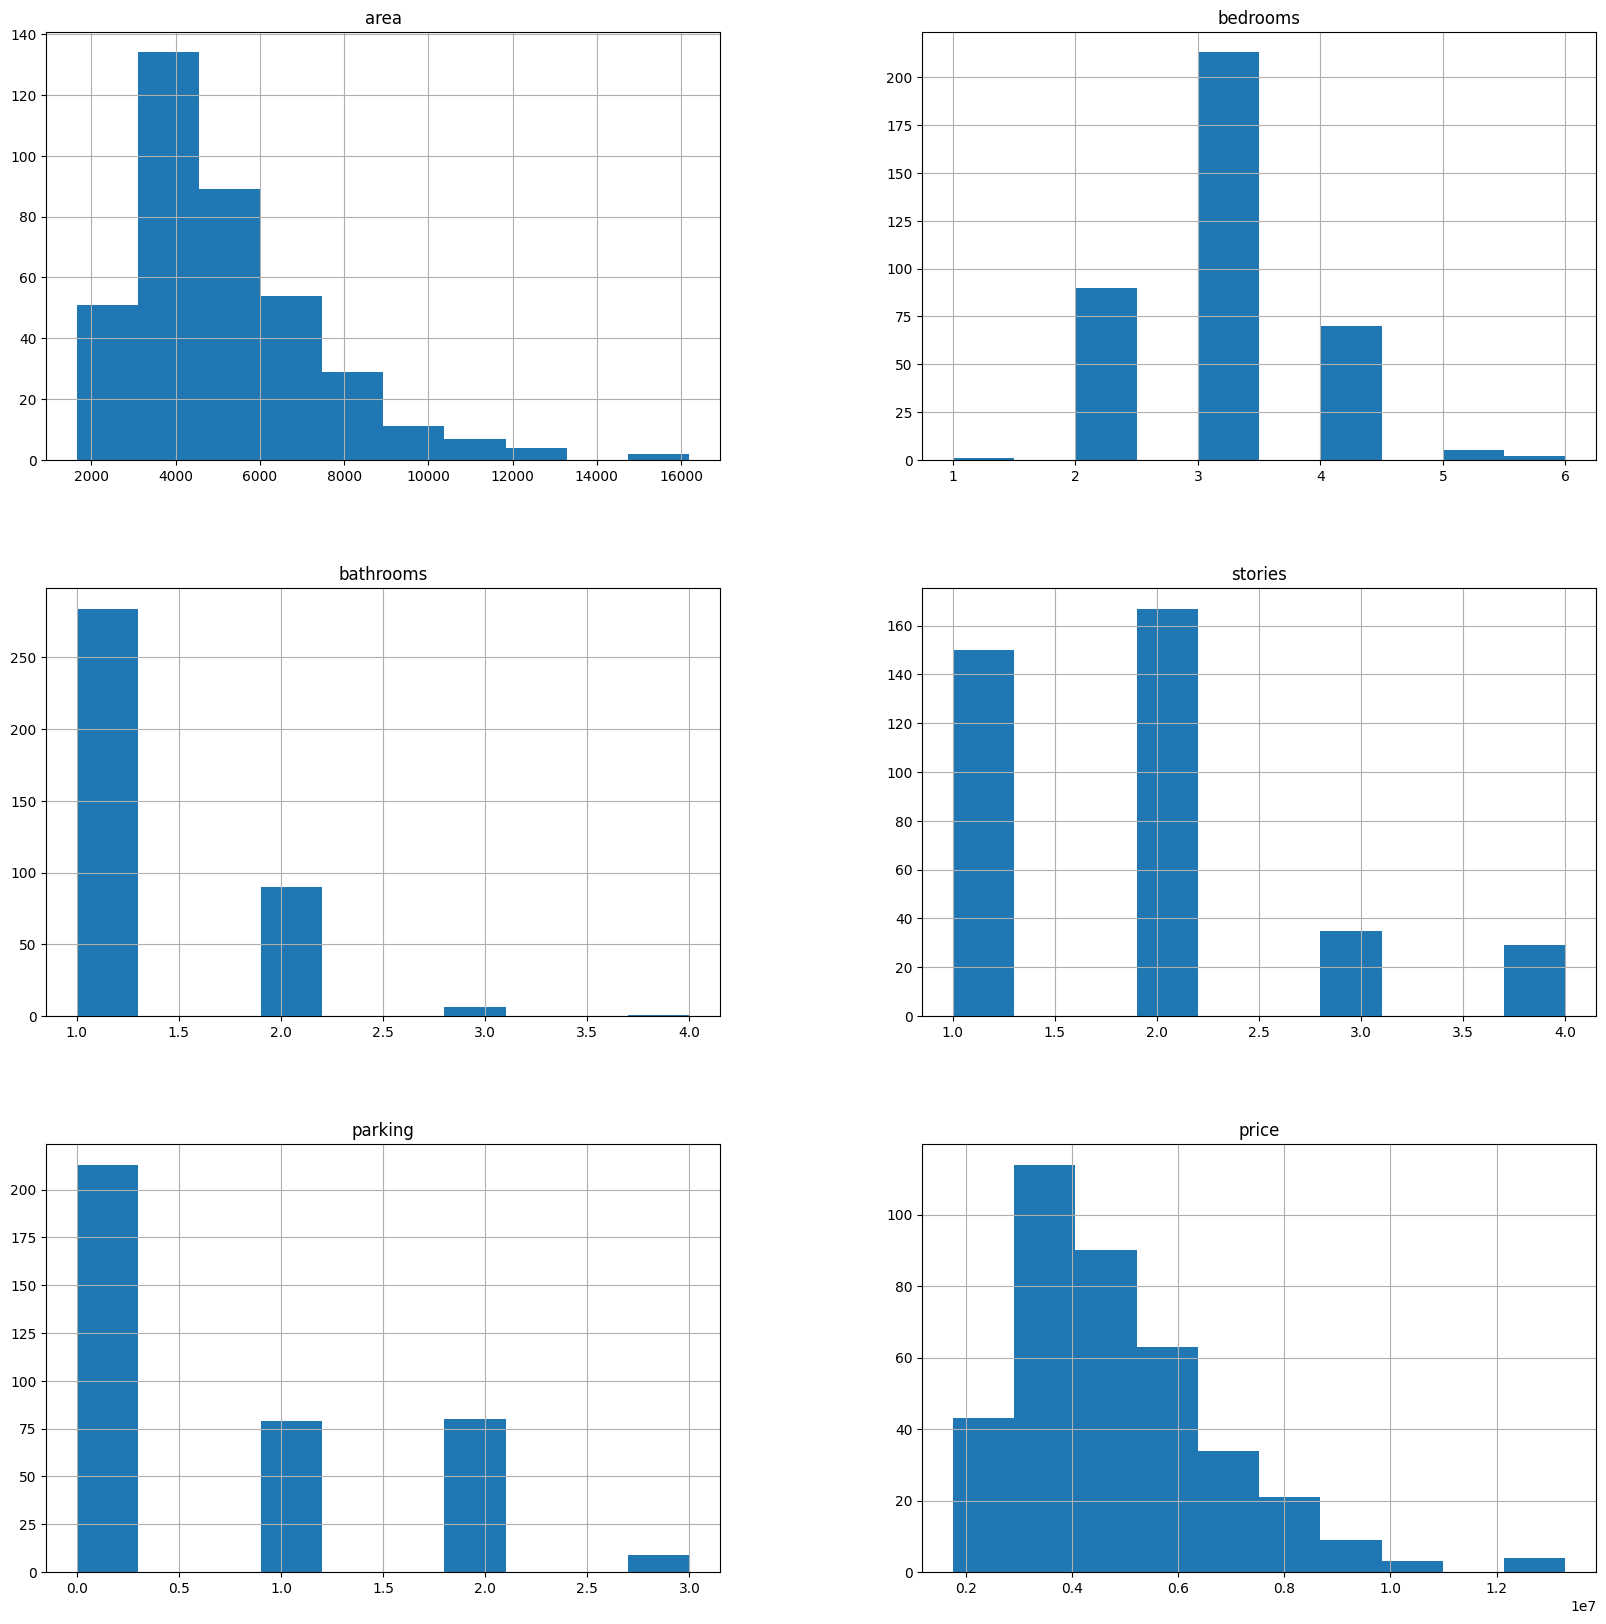

In [12]:
dft.hist(figsize=(20,20))

In [13]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [14]:
dft.groupby('furnishingstatus').count()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
furnishingstatus,,,,,,,,,,,,
furnished,103,103,103,103,103,103,103,103,103,103,103,103
semi-furnished,144,144,144,144,144,144,144,144,144,144,144,144
unfurnished,134,134,134,134,134,134,134,134,134,134,134,134


In [15]:
dft.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
409,3185,2,1,1,yes,no,no,no,no,2,no,unfurnished,3430000
137,4640,4,1,2,yes,no,no,no,no,1,no,semi-furnished,5740000
282,2175,3,1,2,no,yes,yes,no,yes,0,no,unfurnished,4270000
227,6000,2,1,1,yes,no,yes,no,yes,1,no,furnished,4690000
451,6750,2,1,1,yes,no,no,no,no,0,no,semi-furnished,3150000


In [17]:
dft['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    144
unfurnished       134
furnished         103
Name: count, dtype: int64

In [27]:
dft = dft.join(pd.get_dummies(dft.furnishingstatus))

In [28]:
dft.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price,furnished,semi-furnished,unfurnished
409,3185,2,1,1,yes,no,no,no,no,2,no,unfurnished,3430000,False,False,True
137,4640,4,1,2,yes,no,no,no,no,1,no,semi-furnished,5740000,False,True,False
282,2175,3,1,2,no,yes,yes,no,yes,0,no,unfurnished,4270000,False,False,True
227,6000,2,1,1,yes,no,yes,no,yes,1,no,furnished,4690000,True,False,False
451,6750,2,1,1,yes,no,no,no,no,0,no,semi-furnished,3150000,False,True,False


In [32]:
dft = dft.join(pd.get_dummies(dft.mainroad, prefix='basement_'))

In [33]:
dft = dft.join(pd.get_dummies(dft.guestroom, prefix='guestroom_'))

In [25]:
dft.join(pd.get_dummies(dft.basement))

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price,no,yes
409,3185,2,1,1,yes,no,no,no,no,2,no,unfurnished,3430000,True,False
137,4640,4,1,2,yes,no,no,no,no,1,no,semi-furnished,5740000,True,False
282,2175,3,1,2,no,yes,yes,no,yes,0,no,unfurnished,4270000,False,True
227,6000,2,1,1,yes,no,yes,no,yes,1,no,furnished,4690000,False,True
451,6750,2,1,1,yes,no,no,no,no,0,no,semi-furnished,3150000,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,2787,3,1,1,yes,no,yes,no,no,0,yes,furnished,4235000,False,True
362,4050,2,1,1,yes,no,no,no,no,0,no,furnished,3710000,True,False
252,9860,3,1,1,yes,no,no,no,no,0,no,semi-furnished,4515000,True,False
66,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished,6930000,False,True


In [16]:
#furnishingstatus_map = {'furnished': 3, 'semi-furnished': 2, 'unfurnished': 1}
#dft['furnishingstatus']=dft['furnishingstatus'].map(furnishingstatus_map)

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (121115058.py, line 1)

In [ ]:
dft.head()

In [ ]:
dft.groupby('prefarea').count()

In [ ]:
prefarea_map = {'yes':1,'no':0}
dft['prefarea']=dft['prefarea'].map(prefarea_map)

In [ ]:
dft=dft.drop(columns=['mainroad',	'guestroom',	'basement',	'hotwaterheating',	'airconditioning'])

In [ ]:
X_train.drop(columns=['mainroad',	'guestroom',	'basement',	'hotwaterheating',	'airconditioning'], inplace=True)

In [ ]:
X_train['prefarea']=X_train['prefarea'].map(prefarea_map)

In [ ]:
X_train

In [ ]:
dft.corr()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(dft.corr())